In [19]:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("movie_dataset.csv")

# directors, cast, genres, countries columns may be stored as strings; convert them to lists
for col in ['directors', 'cast', 'genres', 'countries']:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: eval(x) if isinstance(x, str) else x)


def plot_barh_with_values(series, title, color, x_min=0):
    fig, ax = plt.subplots(figsize=(12,8))
    bars = ax.barh(series.index, series.values, color=color)
    ax.bar_label(bars, fmt='%d', padding=3)  #write values on bars
    ax.set_xlim(left=x_min) 
    ax.set_xlabel("Movie Count")
    ax.set_ylabel(title)
    ax.set_title(title)
    ax.invert_yaxis()  # highest values on top
    plt.tight_layout()
    plt.show()

Joel Coen               13
Martin Scorsese         12
Quentin Tarantino        9
Steven Spielberg         8
Paul Thomas Anderson     8
Christopher Nolan        8
Wes Anderson             8
Woody Allen              7
Ridley Scott             7
Stanley Kubrick          7
Name: count, dtype: int64


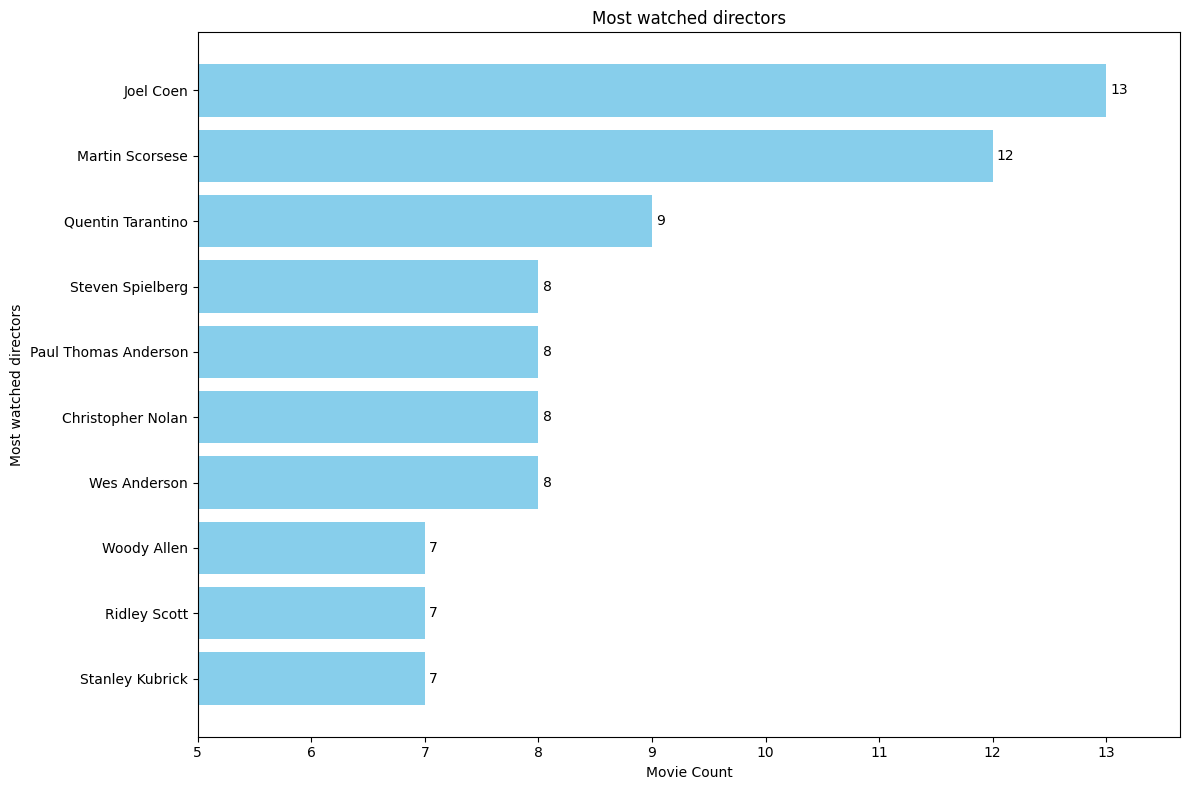

In [4]:
# directors
all_directors = [d for sublist in df['directors'] for d in sublist]
director_counts = pd.Series(all_directors).value_counts()
print(director_counts.head(10))
plot_barh_with_values(director_counts.head(10), "Most watched directors", "skyblue", x_min=5)

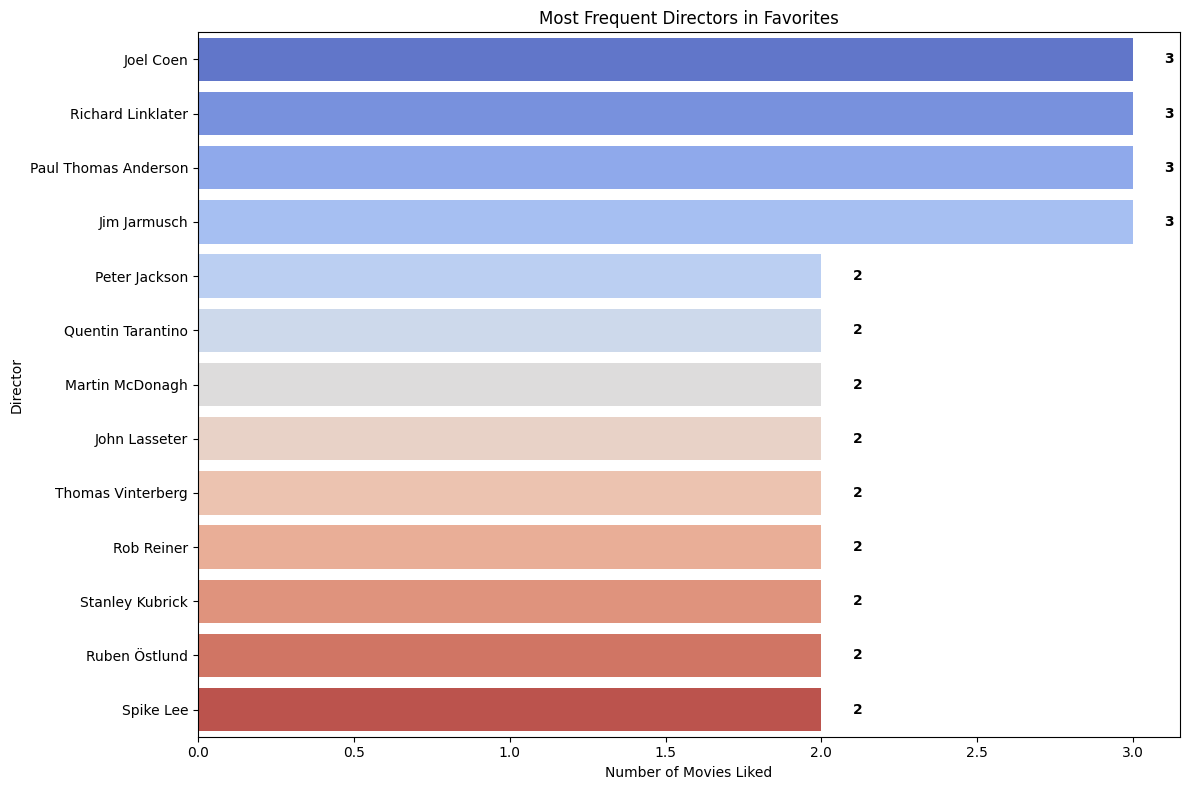

In [14]:
# 1. Ensure 'is_favorite' is correctly mapped
liked = pd.read_csv("liked_films.csv")
df['title_clean'] = df['title'].str.lower().str.strip()
liked['name_clean'] = liked['Name'].str.lower().str.strip()
df['is_favorite'] = df['title_clean'].isin(liked['name_clean'])

# 2. Filter for liked movies
liked_df = df[df['is_favorite'] == True]

#Ai assitance to solve Coen directors issue
# This treats ['Joel Coen', 'Ethan Coen'] as two separate entries
liked_dirs_individual = [d for sublist in liked_df['directors'] for d in sublist]

# Count and show the top directors
true_liked_counts = pd.Series(liked_dirs_individual).value_counts()


liked_directors_flattened = [d for sublist in liked_df['directors'] for d in sublist]

# Get the counts for individual directors
liked_director_counts = pd.Series(liked_directors_flattened).value_counts().head(13)

# 3. Plotting
plt.figure(figsize=(12, 8))
sns.barplot(
    x=liked_director_counts.values, 
    y=liked_director_counts.index, 
    hue=liked_director_counts.index,
    palette="coolwarm",
    legend=False
)

# Add values on the bars for clarity
for i, v in enumerate(liked_director_counts.values):
    plt.text(v + 0.1, i, str(v), color='black', va='center', fontweight='bold')

plt.title("Most Frequent Directors in Favorites")
plt.xlabel("Number of Movies Liked")
plt.ylabel("Director")
plt.tight_layout()
plt.show()


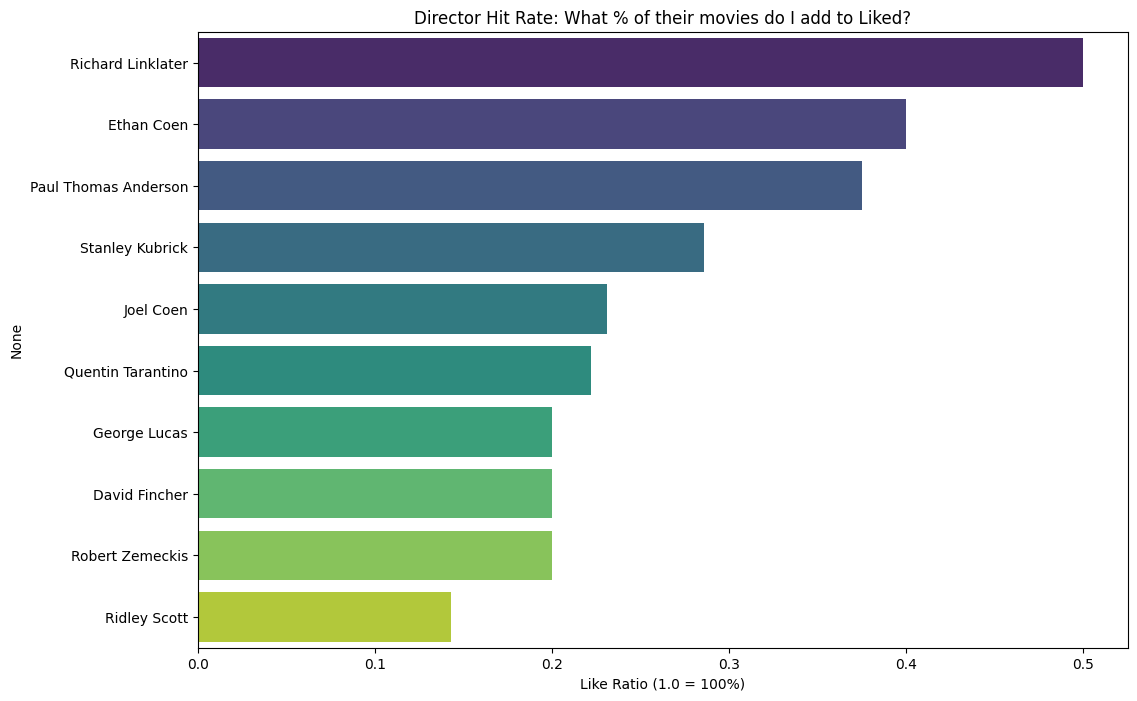

                      Watched  Liked     Ratio
Richard Linklater           6    3.0  0.500000
Ethan Coen                  5    2.0  0.400000
Paul Thomas Anderson        8    3.0  0.375000
Stanley Kubrick             7    2.0  0.285714
Joel Coen                  13    3.0  0.230769
Quentin Tarantino           9    2.0  0.222222
George Lucas                5    1.0  0.200000
David Fincher               5    1.0  0.200000
Robert Zemeckis             5    1.0  0.200000
Ridley Scott                7    1.0  0.142857


In [6]:
# Director Hit Rate Analysis
liked = pd.read_csv("liked_films.csv")
df['title_clean'] = df['title'].str.lower().str.strip()
liked['name_clean'] = liked['Name'].str.lower().str.strip()

df['is_favorite'] = df['title_clean'].isin(liked['name_clean'])

# Get total counts for all watched directors
all_dirs = [d for sublist in df['directors'] for d in sublist]
total_counts = pd.Series(all_dirs).value_counts()

# Get counts for liked directors
liked_df = df[df['is_favorite'] == True]
liked_dirs = [d for sublist in liked_df['directors'] for d in sublist]
liked_counts = pd.Series(liked_dirs).value_counts()

# Create the ratio DataFrame
ratio_df = pd.DataFrame({
    'Watched': total_counts,
    'Liked': liked_counts
}).fillna(0)

# Calculate ratio for directors with at least 5 movies watched
ratio_df = ratio_df[ratio_df['Watched'] >= 5].copy()
ratio_df['Ratio'] = ratio_df['Liked'] / ratio_df['Watched']
ratio_df = ratio_df.sort_values(by='Ratio', ascending=False)

# Plot top 10 directors by like ratio
plt.figure(figsize=(12,8))
sns.barplot(x=ratio_df['Ratio'].head(10), y=ratio_df.head(10).index, hue=ratio_df.head(10).index, palette="viridis", legend=False)
plt.title("Director Hit Rate: What % of their movies do I add to Liked?")
plt.xlabel("Like Ratio (1.0 = 100%)")
plt.show()

print(ratio_df[['Watched', 'Liked', 'Ratio']].head(10))

Matt Damon                15
Brad Pitt                 13
Tom Hanks                 13
Bill Murray               13
Robert De Niro            12
Philip Seymour Hoffman    12
Leonardo DiCaprio         12
Scarlett Johansson        11
Woody Harrelson           10
Christian Bale            10
Natalie Portman            9
Emma Stone                 9
Adam Driver                9
Frances McDormand          9
Keanu Reeves               9
Name: count, dtype: int64


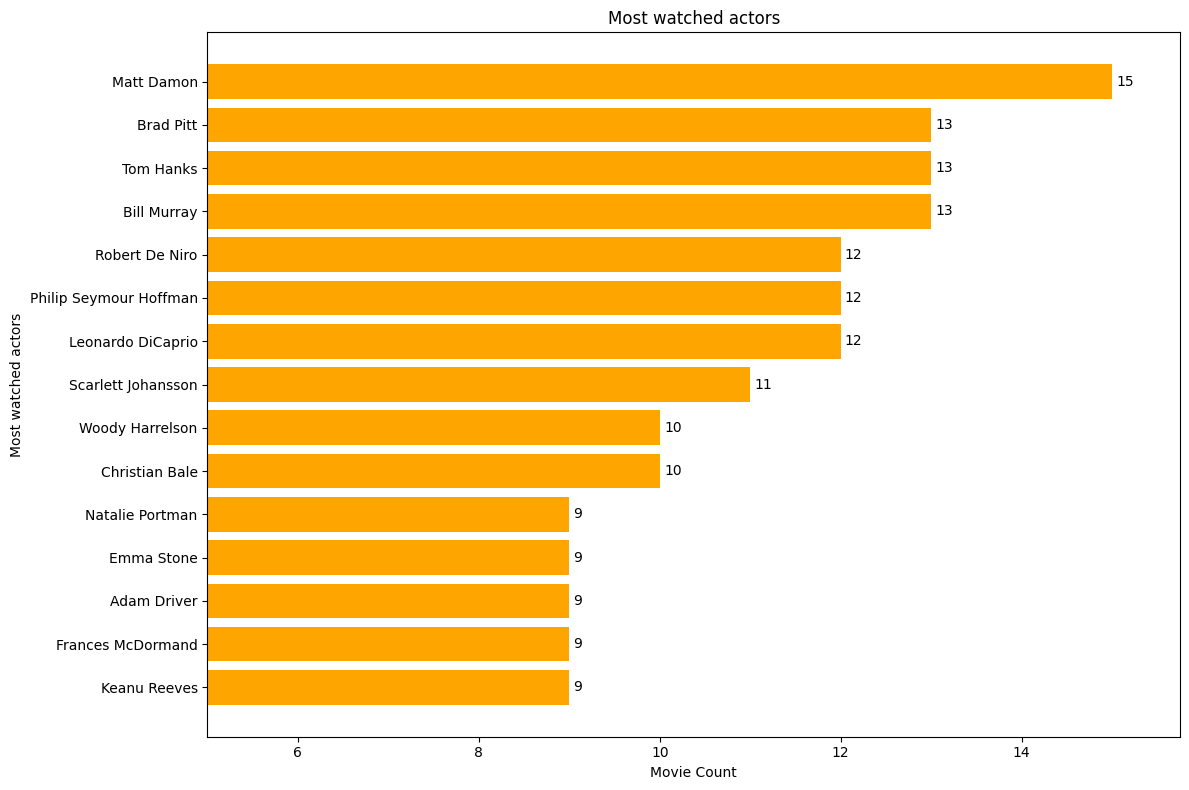

In [9]:
# cast
all_actors = [a for sublist in df['cast'] for a in sublist]
actor_counts = pd.Series(all_actors).value_counts()
print(actor_counts.head(15))
plot_barh_with_values(actor_counts.head(15), "Most watched actors", "orange", x_min=5)

In [11]:
#Used Gemini to help write this part
# 1. Get the names of the top 15 actors
top_15_actors = actor_counts.head(15).index.tolist()

# 2. Filter the dataframe for movies where at least one actor from the top 15 is in the cast list
# We use a set intersection to see if any of the top 15 names are in each movie's cast list
def has_top_actor(cast_list):
    return any(actor in cast_list for actor in top_15_actors)

movies_with_top_actors = df[df['cast'].apply(has_top_actor)]

# 3. Calculate the unique count and percentage
unique_movie_count = len(movies_with_top_actors)
total_movies = len(df)
percentage = (unique_movie_count / total_movies) * 100

print(f"Unique movies featuring at least one of the top 15 actors: {unique_movie_count}")
print(f"Total movies in dataset: {total_movies}")
print(f"True Percentage: {percentage:.2f}%")

Unique movies featuring at least one of the top 15 actors: 142
Total movies in dataset: 512
True Percentage: 27.73%



 Most watched genres:
Drama              327
Comedy             182
Crime              112
Thriller           110
Action              92
Adventure           91
Romance             89
Science Fiction     59
Mystery             46
Fantasy             41
Animation           39
Family              35
History             25
War                 21
Horror              17
Name: count, dtype: int64


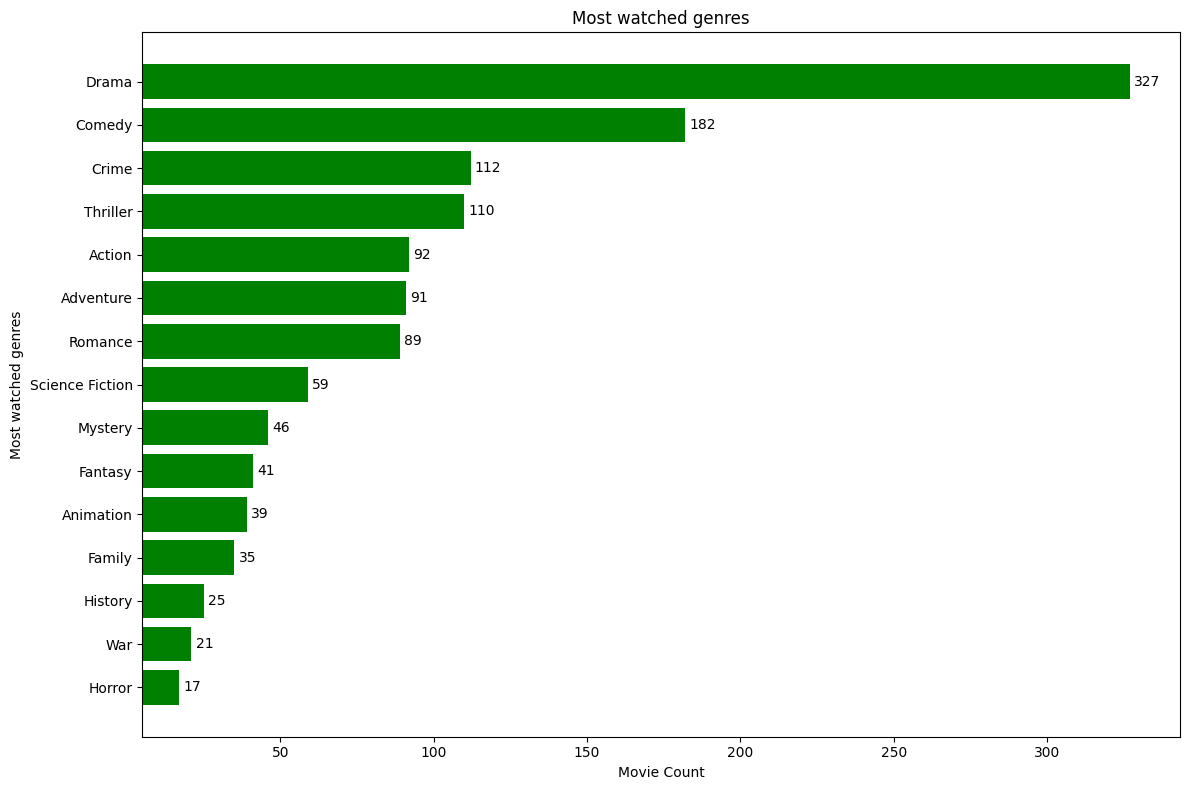

In [6]:
#Most watched genres
all_genres = [g for sublist in df['genres'] for g in sublist]
genre_counts = pd.Series(all_genres).value_counts()
print("\n Most watched genres:")
print(genre_counts.head(15))
plot_barh_with_values(genre_counts.head(15), "Most watched genres", "green", x_min=5)

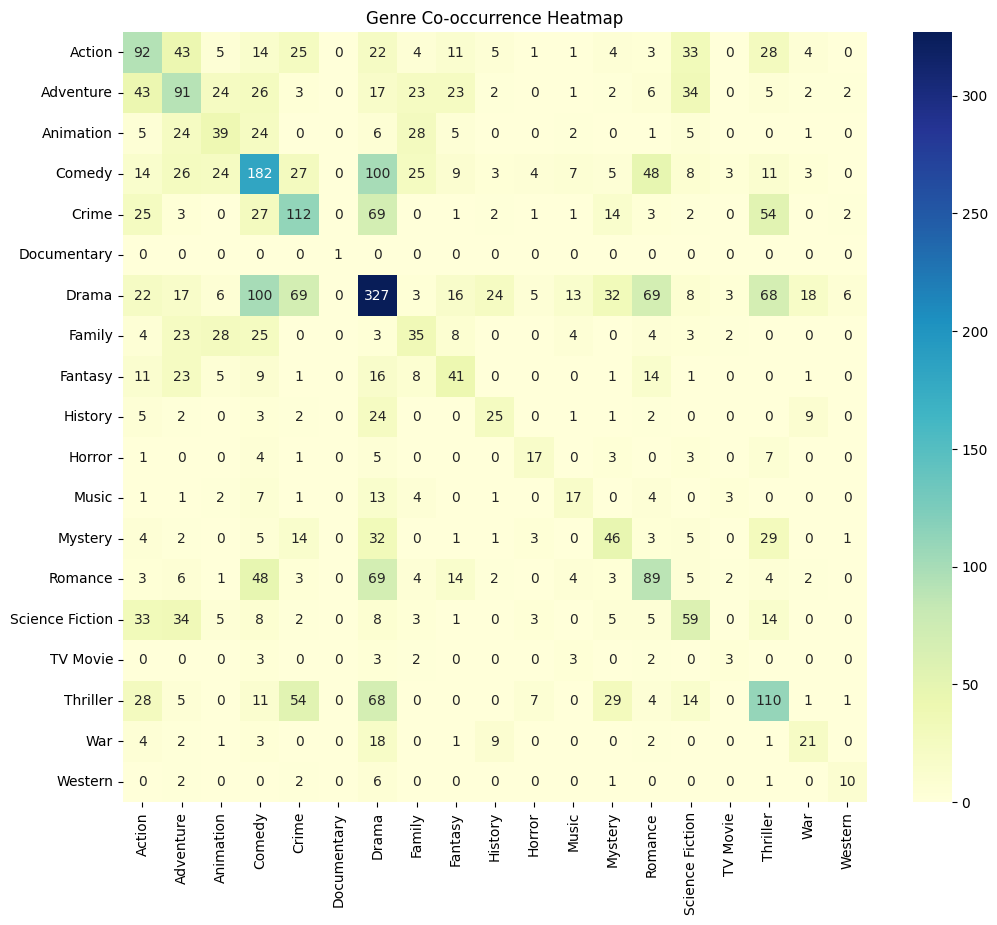

In [7]:
# Genre co-occurrence heatmap
# Make sure genres are lists, not strings
df['genres'] = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Get unique genres
unique_genres = sorted({g for sublist in df['genres'] for g in sublist})

# Create co-occurrence matrix
co_matrix = pd.DataFrame(0, index=unique_genres, columns=unique_genres)

for genres in df['genres']:
    if isinstance(genres, list):
        for g1, g2 in combinations(genres, 2):
            co_matrix.at[g1, g2] += 1
            co_matrix.at[g2, g1] += 1  # symmetric

# Fill diagonal with counts of individual genres
for g in unique_genres:
    co_matrix.at[g, g] = sum(g in genres for genres in df['genres'])

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(co_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Genre Co-occurrence Heatmap")
plt.show()

In [9]:
# Filter the dataframe for only liked movies
liked_movies = df[df['is_favorite'] == True]

# Count how many of these have 'Comedy' in their genres list
comedy_count = liked_movies['genres'].apply(lambda x: 'Comedy' in x).sum()

# Calculate the percentage for your presentation
total_liked = len(liked_movies)
percentage = (comedy_count / total_liked) * 100 if total_liked > 0 else 0

print(f"Total Liked Movies: {total_liked}")
print(f"Number of Comedies in Liked list: {comedy_count}")
print(f"Comedy makes up {percentage:.1f}% of my favorites.")

Total Liked Movies: 69
Number of Comedies in Liked list: 34
Comedy makes up 49.3% of my favorites.


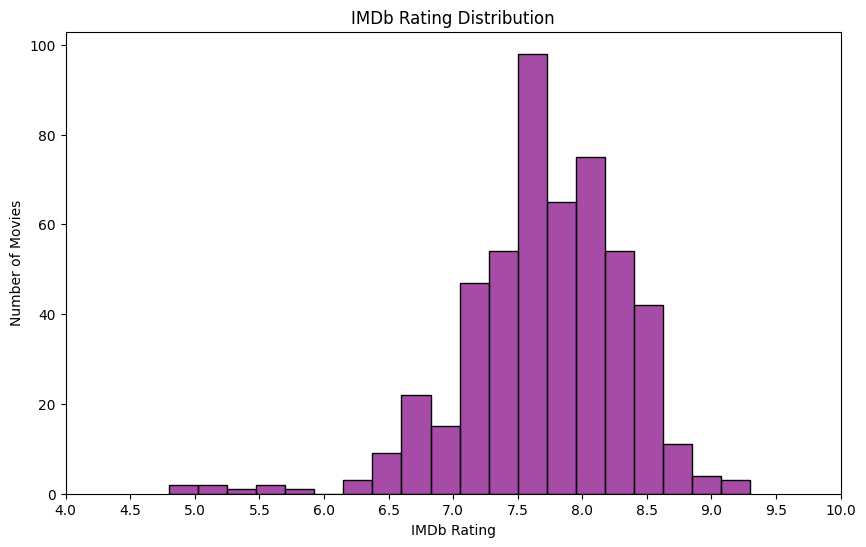

In [20]:
# IMDb Rating Distribution
if 'imdb_rating' in df.columns:
    df['imdb_rating'] = pd.to_numeric(df['imdb_rating'], errors='coerce')

    plt.figure(figsize=(10,6))
    sns.histplot(df['imdb_rating'].dropna(), bins=20, color='purple', alpha=0.7)
    plt.xlabel("IMDb Rating")
    plt.ylabel("Number of Movies")
    plt.title("IMDb Rating Distribution")
    plt.xlim(4, 10)  # rating scale

    # Custom x-axis ticks at 0.5 increments
    plt.xticks(np.arange(4, 10.5, 0.5))
    plt.show()

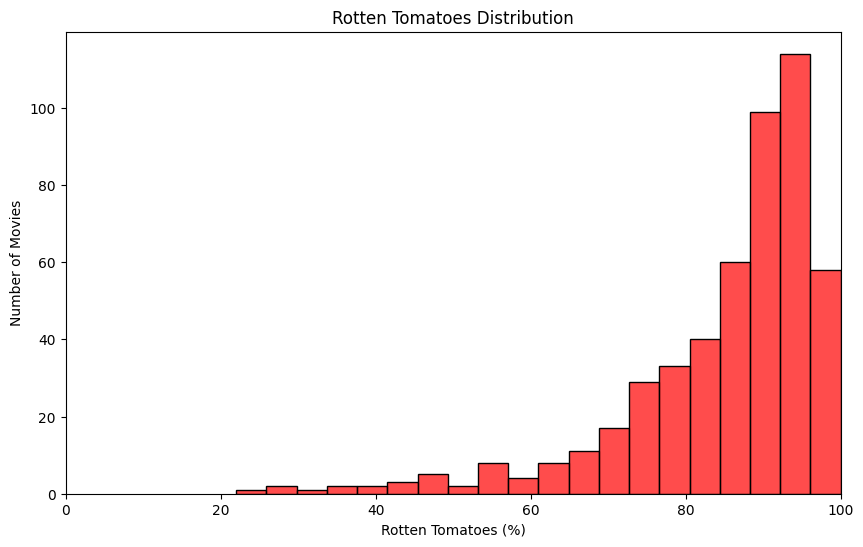

In [21]:
# Rotten Tomatoes Distribution
if 'rt_rating' in df.columns:
    # Convert percentage string to float
    df['rt_rating'] = df['rt_rating'].str.replace('%','').astype(float)

    plt.figure(figsize=(10,6))
    sns.histplot(df['rt_rating'].dropna(), bins=20, color='red', alpha=0.7)
    plt.xlabel("Rotten Tomatoes (%)")
    plt.ylabel("Number of Movies")
    plt.title("Rotten Tomatoes Distribution")
    plt.xlim(0, 100)  # RT is 0-100%
    plt.show()

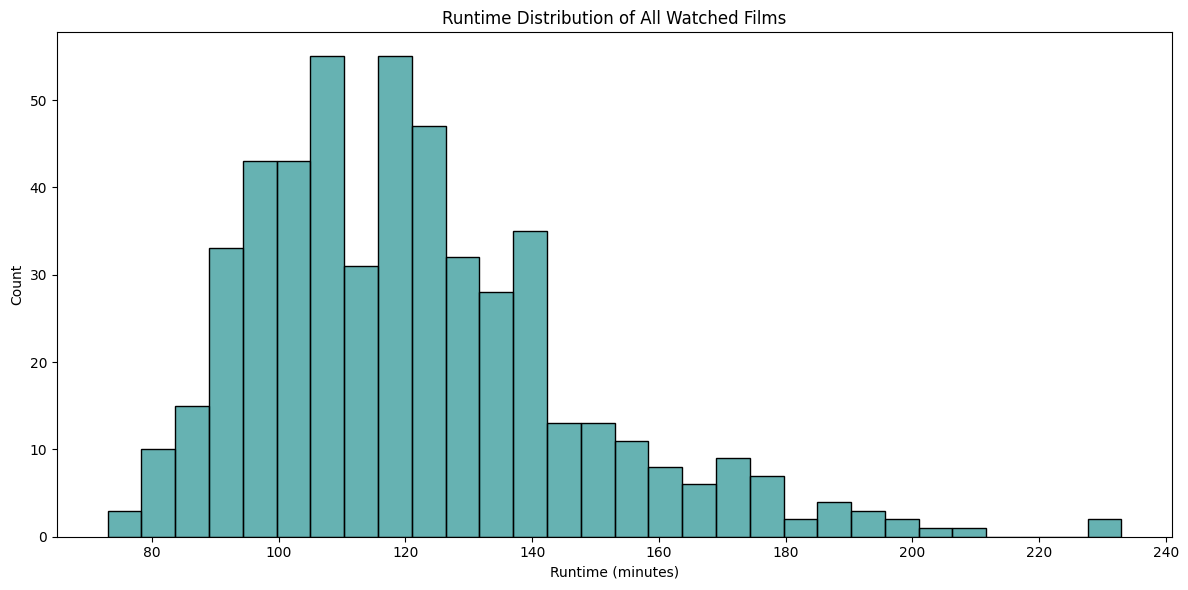

In [10]:
plt.figure(figsize=(12,6))

sns.histplot(
    data=df,
    x="runtime",
    bins=30,       
    color="teal",
    alpha=0.6
)

plt.title("Runtime Distribution of All Watched Films")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [16]:
# Calculate the means
mean_runtime_all = df['runtime'].mean()
mean_runtime_liked = df[df['is_favorite'] == True]['runtime'].mean()

# Print the results
print(f"Average Runtime (All Watched): {mean_runtime_all:.1f} minutes")
print(f"Average Runtime (Liked): {mean_runtime_liked:.1f} minutes")

# Calculate the difference
diff = mean_runtime_liked - mean_runtime_all
print(f"Difference: {diff:.1f} minutes")

Average Runtime (All Watched): 120.9 minutes
Average Runtime (Liked): 121.4 minutes
Difference: 0.5 minutes


In [10]:
# Calculate total minutes
total_minutes = df['runtime'].sum()

# Convert to hours and days for context
total_hours = total_minutes / 60
total_days = total_hours / 24

print(f"Total Minutes: {total_minutes:,.0f}")
print(f"Total Hours: {total_hours:,.1f}")
print(f"Total Days: {total_days:,.2f}")

Total Minutes: 61,913
Total Hours: 1,031.9
Total Days: 43.00


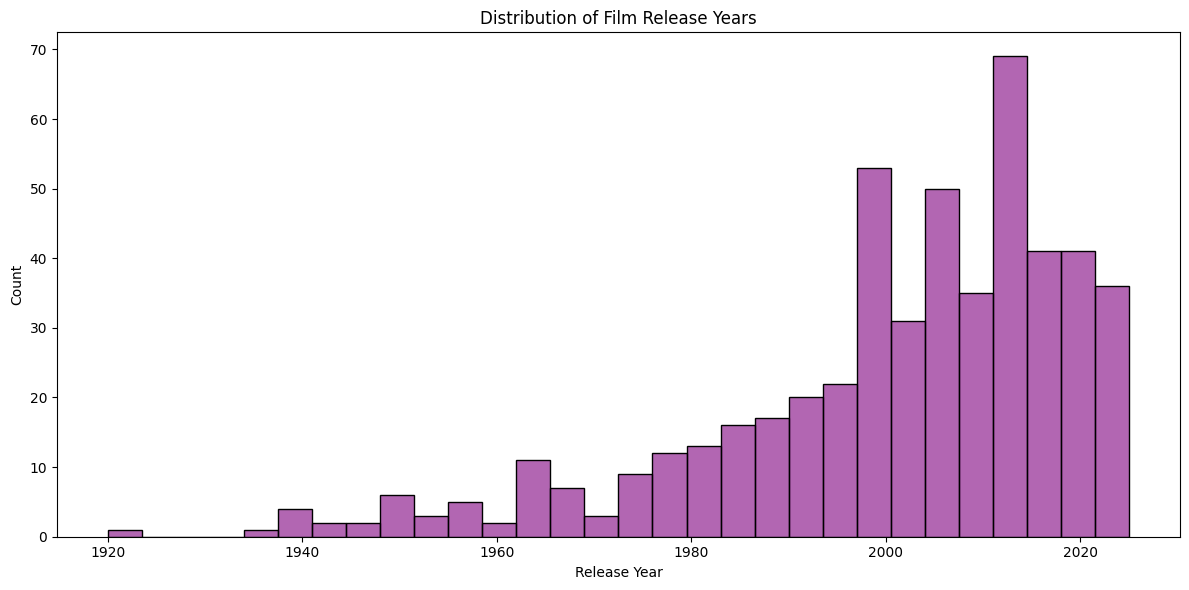

In [13]:
plt.figure(figsize=(12,6))

sns.histplot(
    data=df,
    x="release_year",
    bins=30,
    color="purple",
    alpha=0.6
)

plt.title("Distribution of Film Release Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

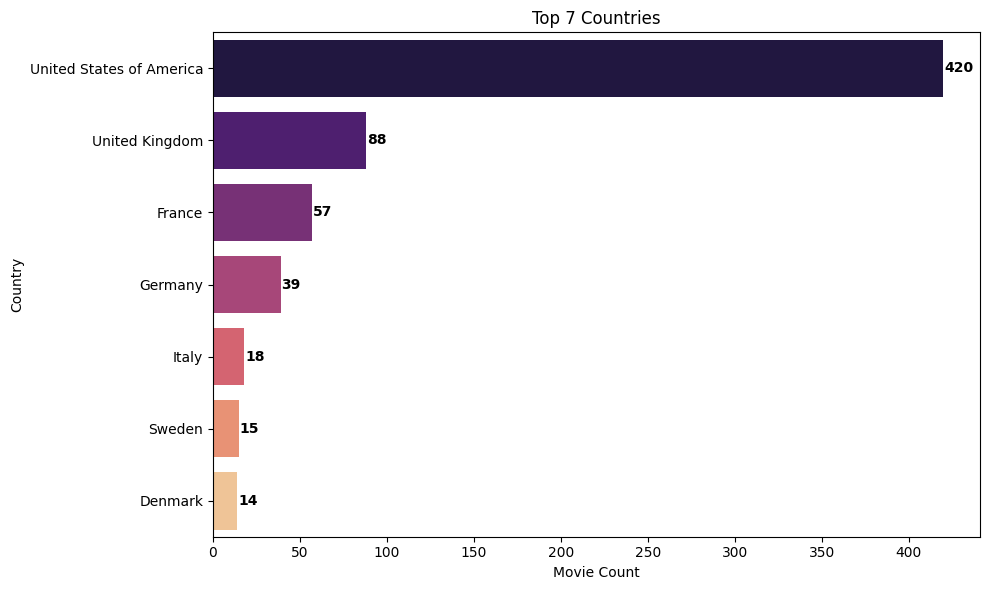

United States of America    420
United Kingdom               88
France                       57
Germany                      39
Italy                        18
Sweden                       15
Denmark                      14
Name: count, dtype: int64


In [4]:
# Flatten the countries list and get counts
all_countries = [c for sublist in df['countries'] for c in sublist]
country_counts = pd.Series(all_countries).value_counts()
top_7_countries = country_counts.head(7)

# Plotting the Top 5 Countries
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_7_countries.values, 
    y=top_7_countries.index, 
    hue=top_7_countries.index,
    palette="magma",
    legend=False
)

# Adding labels to the bars
for i, v in enumerate(top_7_countries.values):
    plt.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')

plt.title("Top 7 Countries")
plt.xlabel("Movie Count")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Print the numbers for your slide description
print(top_7_countries)

In [ ]:
import ast
import pandas as pd
from scipy.stats import chisquare

movies = pd.read_csv("movie_dataset.csv")

df = movies  

# for directors column, convert string representation of list to actual list
def normalize_directors(x):
    try:
        lst = ast.literal_eval(x) if isinstance(x, str) else x
        if isinstance(lst, list):
            return " + ".join(lst)
        return lst
    except:
        return str(x)

df['director_norm'] = df['directors'].apply(normalize_directors)

# Observed counts
obs = df['director_norm'].value_counts()


obs = obs[obs >= 2]  #minimum 2 movies per director
k = len(obs) 


#Expected distribution (uniform)

exp = [obs.sum() / k] * k

# Chi-square goodness-of-fit
chi2, p = chisquare(f_obs=obs, f_exp=exp)

print("DIRECTOR BIAS TEST (Uniform Expected)")
print("Chi-square:", chi2)
print("p-value:", p)

if p < 0.05:
    print("\n➡️ RESULT: There is a **significant bias** in director selection.")
else:
    print("\n➡️ RESULT: No significant bias detected in director selection.")

DIRECTOR BIAS TEST (Uniform Expected)
Chi-square: 105.78523489932887
p-value: 0.09524508172896336

➡️ RESULT: No significant bias detected in director selection.


In [22]:
import pandas as pd
import ast
from collections import Counter
from scipy.stats import chisquare


movies = pd.read_csv("movie_dataset.csv") 
df = movies


#Normalize cast column (convert string to list)
def normalize_cast(x):
    try:
        lst = ast.literal_eval(x) if isinstance(x, str) else x
        if isinstance(lst, list):
            return lst
        return [lst]
    except:
        return [str(x)]

df['cast_norm'] = df['cast'].apply(normalize_cast)


# Take top 3 cast members for each movie
df['top3_cast'] = df['cast_norm'].apply(lambda x: x[:3])

all_top3 = [actor for sublist in df['top3_cast'] for actor in sublist]

# Observed counts
obs_counts = Counter(all_top3)

#Keep only actors appearing in at least 2 movies
obs_counts = {actor: count for actor, count in obs_counts.items() if count >= 2}
k = len(obs_counts)
obs = list(obs_counts.values())

#Expected distribution (uniform)
exp = [sum(obs)/k] * k

#Chi-square goodness-of-fit
chi2, p = chisquare(f_obs=obs, f_exp=exp)

print("TOP 3 CAST BIAS TEST (Uniform Expected)")
print("Chi-square:", chi2)
print("p-value:", p)

if p < 0.05:
    print("\n➡️ RESULT: There is **bias** in top 3 actor selection.")
else:
    print("\n➡️ RESULT: No significant bias in top 3 actor selection.")

TOP 3 CAST BIAS TEST (Uniform Expected)
Chi-square: 289.8883312421581
p-value: 0.03835687458991395

➡️ RESULT: There is **bias** in top 3 actor selection.


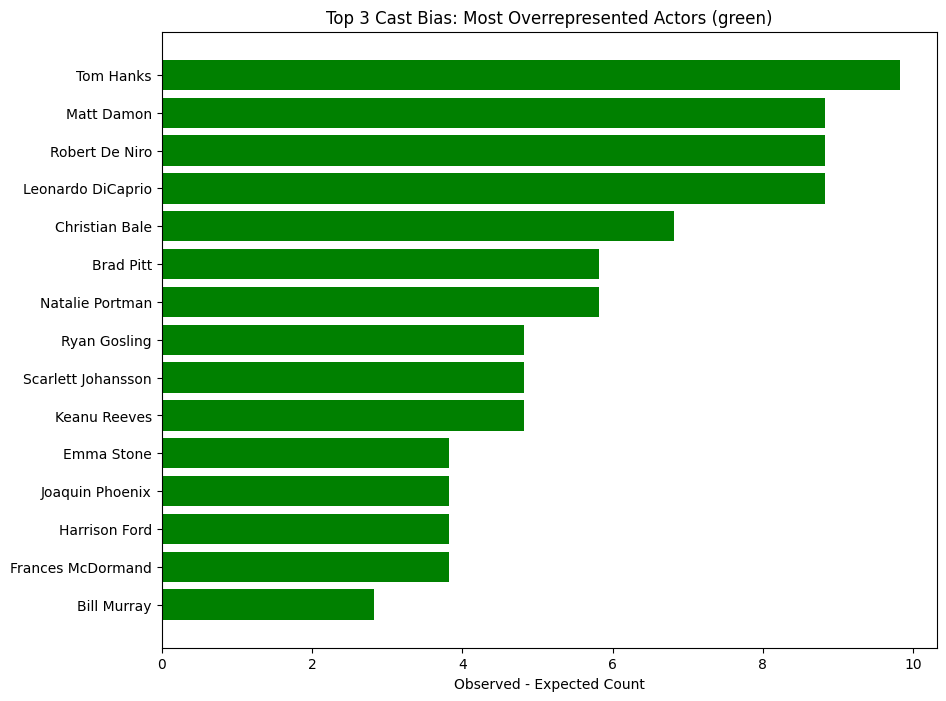

In [38]:
import pandas as pd

# Create a DataFrame to compare observed vs expected
bias_df = pd.DataFrame({
    "Actor": list(obs_counts.keys()),
    "Observed": list(obs_counts.values()),
    "Expected": exp
})

# Calculate the difference
bias_df["Difference"] = bias_df["Observed"] - bias_df["Expected"]

# Now select top 15 overrepresented actors
top_over = bias_df[bias_df["Difference"] > 0].nlargest(15, "Difference")

# Plot
import matplotlib.pyplot as plt
colors = ['green'] * len(top_over)

plt.figure(figsize=(10,8))
plt.barh(top_over["Actor"], top_over["Difference"], color=colors)
plt.xlabel("Observed - Expected Count")
plt.title("Top 3 Cast Bias: Most Overrepresented Actors (green)")
plt.gca().invert_yaxis()
plt.show()

In [9]:
from scipy.stats import ttest_1samp

# Ensure IMDb ratings are numeric
df['imdb_rating'] = pd.to_numeric(df['imdb_rating'], errors='coerce')

# IMDb ratings
imdb = df['imdb_rating'].dropna()

# Test against 7.0 (benchmark)
t_stat_imdb_7, p_value_imdb_7 = ttest_1samp(imdb, 7.0, alternative='greater')

print("\nAgainst 7.0 benchmark:")
print("t-stat:", t_stat_imdb_7)
print("p-value:", p_value_imdb_7)

if p_value_imdb_7 < 0.05:
    print("➡️ RESULT: The mean IMDb rating is significantly greater than 7.0")
else:
    print("➡️ RESULT: Cannot reject H₀ at 7.0")

#Test against 7.5
t_stat_imdb_75, p_value_imdb_75 = ttest_1samp(imdb, 7.5, alternative='greater')
print("\nAgainst 7.5 benchmark:")   
print("t-stat:", t_stat_imdb_75)
print("p-value:", p_value_imdb_75)
if p_value_imdb_75 < 0.05:
    print("➡️ RESULT: The mean IMDb rating is significantly greater than 7.5")
else:
    print("➡️ RESULT: Cannot reject H₀ at 7.5")





Against 7.0 benchmark:
t-stat: 23.578708342985355
p-value: 6.187697524754422e-84
➡️ RESULT: The mean IMDb rating is significantly greater than 7.0

Against 7.5 benchmark:
t-stat: 6.350712275761104
p-value: 2.3772939935099567e-10
➡️ RESULT: The mean IMDb rating is significantly greater than 7.5


In [15]:
# Ensure RT ratings are numeric
df['rt_rating'] = df['rt_rating'].astype(str).str.replace('%','', regex=False)
df['rt_rating'] = pd.to_numeric(df['rt_rating'], errors='coerce')

rt = df['rt_rating'].dropna()

#Test against 75
t_stat_rt_75, p_value_rt_75 = ttest_1samp(rt, 75, alternative='greater')
print("\nAgainst 75 benchmark:")    
print("t-stat (7.5):", t_stat_rt_75)
print("p-value (7.5):", p_value_rt_75)      
if p_value_rt_75 < 0.05:
    print("➡️ RESULT: The mean RT score is significantly greater than 75")
else:
    print("➡️ RESULT: Cannot reject H₀ at 75")

#Test against 80
t_stat_rt_80, p_value_rt_80 = ttest_1samp(rt, 80, alternative='greater')
print("\nAgainst 80 benchmark:")    
print("t-stat (8.0):", t_stat_rt_80)
print("p-value (8.0):", p_value_rt_80)
if p_value_rt_80 < 0.05:
    print("➡️ RESULT: The mean RT score is significantly greater than 80")
else:
    print("➡️ RESULT: Cannot reject H₀ at 80")



Against 75 benchmark:
t-stat (7.5): 16.995072513036565
p-value (7.5): 1.0083888960026575e-51
➡️ RESULT: The mean RT score is significantly greater than 75

Against 80 benchmark:
t-stat (8.0): 8.629969747199867
p-value (8.0): 4.147551126509469e-17
➡️ RESULT: The mean RT score is significantly greater than 80
